In [16]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

using CSV, DelimitedFiles, DataFrames

In [4]:
splg_methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    #"iid LS",
    "ST JL-LS",
    # "ST LS",
]

# simulation parameters
n_batch = 6 # maximum batch size considered
n_rep = 1 # number of runs

1

## Combinatorial Laplacian with random graphs

ER graph

$q=0.1$

In [18]:
rng = Random.default_rng()

# connection graph parameters

n = 2000
p = 0.01
eta = 0.

# regularization parameter
q = 0.1 #0.001 good one


# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)


# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")


cond nb of Laplacian: 7.392194308452984e16
k = 

401 vs nb edges= 19854
 
k = 

401 vs nb edges= 19854
 
method: DPP(K) unifmethod: 

DPP(K) JL-LS

InterruptException: InterruptException:

$q= 0.001$

cond nb of Laplacian: 36763.899705059055
k = 

402 vs nb edges= 20183
 
k = 

402 vs nb edges= 20183
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

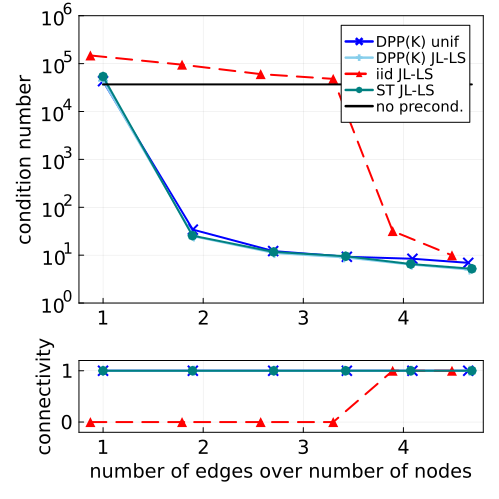

ST JL-LS

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondERn2000p0.01eta0.0q0.001.pdf"

In [19]:
rng = Random.default_rng()

# connection graph parameters

n = 2000
p = 0.01
eta = 0.

# regularization parameter
q = 0.001 


# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple ER graph
meta_g = gen_graph_mun(rng, n, p, eta)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)


# plotting
y_limits = (1,1e6)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
name = "precond"*"ER"*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
Plots.savefig("figures/"*name*".pdf")


In [7]:
using PlotlyJS
name = "nb_roots_ER"*string(q)

#q = 0.001
q = 0.1
nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    # cycles = get_prop(mtsf, :cycle_nodes)
    # nb_cycles[i_sample] = length(cycles)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

In [8]:
name = "nb_roots_ER"*string(q)

#labels = string.(sort(unique(Int.(nb_roots))))
cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")

"figures/nb_roots_ER0.1.pdf"

 SBM graph

is connected? true
least eigenvalue of Laplacian: 

0.10000000000000048


k = 409 vs nb edges= 24846
 


k = 409 vs nb edges= 24846
 
method: DPP(K) unif

method: DPP(K) JL-LS

method: iid JL-LS

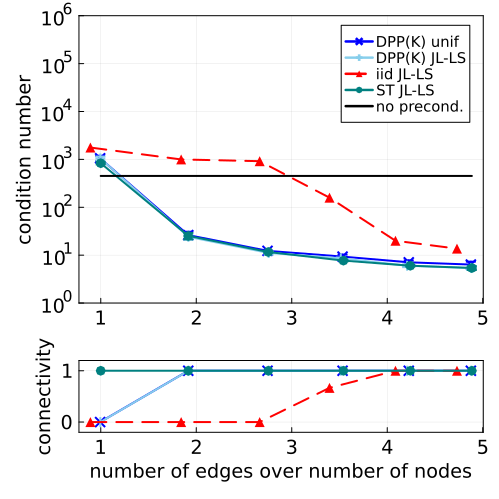

method: ST JL-LS

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondSBMq0.1.pdf"

In [10]:
rng = Random.default_rng()

# graph parameters
c = [20 5 ;
5 20]

# c = [100 0.01 ;
# 0.01 100]
# n = [1000 ; 1000]
n = [1000, 1000]

# regularization parameter
q = 0.1 #0.01


# storing settings
#D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# simple SBM graph
g =  stochastic_block_model(c, n)
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

println("is connected? ", is_connected(g))


# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "precond"*"SBM"*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e6)#(1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")

# D_DPP = D_results["DPP(K) JL-LS"]
# D_iid = D_results["iid JL-LS"]

# t_DPP = D_DPP["timing"]
# t_iid = D_iid["timing"]

# print(D_iid["connected"])

In [10]:
using PlotlyJS
name = "nb_roots_SBM"*string(q)

nb_samples = 200
nb_roots = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    # cycles = get_prop(mtsf, :cycle_nodes)
    # nb_cycles[i_sample] = length(cycles)
    nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    

#labels = string.(sort(unique(Int.(nb_roots))))
cat_nb_roots = string.(sort(Int.(nb_roots)))
trace = PlotlyJS.histogram(x=cat_nb_roots, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")

"figures/nb_roots_SBM0.01.pdf"

## Magnetic Laplacian with random graphs

MUN graph model

cond nb of Laplacian: 7.4623257996705305e6
k = 

398 vs nb edges= 20130
 
k = 

398 vs nb edges= 20130
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

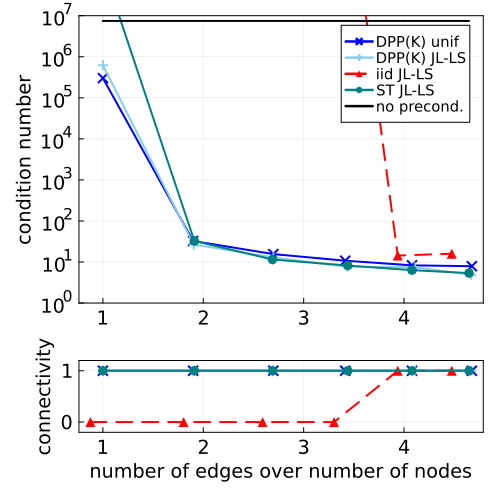

ST JL-LS

"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondMUNn2000p0.01eta0.001q0.pdf"

In [20]:
type = "MUN" 

rng = Random.default_rng()

# connection graph parameters
n = 2000#100
p = 0.01#0.9
eta = 1e-3#1e-3

# regularization parameter
q = 0


# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e7)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# # saving plot
Plots.savefig("figures/"*name*".pdf")


In [12]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
end    


name = "nb_cycles_MUN_precond_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


"figures/nb_cycles_MUN_precond_MUN0.001.pdf"

ERO graph model

least eigenvalue of Laplacian: 0.0005811063627036751
k = 

397 vs nb edges= 19891
 
k = 

397 vs nb edges= 19891
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

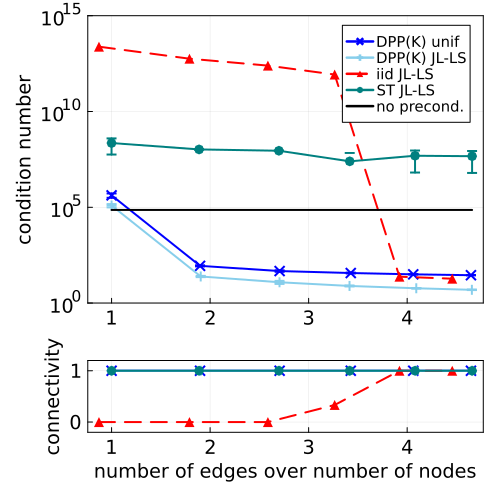

ST JL-LS

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [39]:
type = "ERO" 

rng = Random.default_rng()

# connection graph parameters
n = 2000 # 100
p = 0.01 #0.9
eta =  1e-4 # 1e-3

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# planted ranking score
planted_score = randperm(rng,n)

# graph model
meta_g = MetaGraph(n)

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng; q_system=1e-13,splg_methods)
name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# # saving plot
y_limits = (1,1e15)

name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# Plots.savefig("figures/"*name*".pdf")

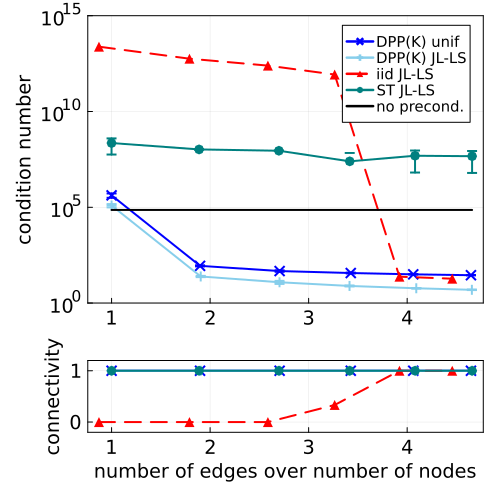

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/precondEROn2000p0.01eta0.0001q0.pdf"

In [40]:
# # saving plot
y_limits = (1,1e15)

name = "precond"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

Plots.savefig("figures/"*name*".pdf")

In [15]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    #nb_roots[i_sample] = length(get_prop(mtsf, :roots))
end    


name = "nb_cycles_"*type*string(eta)

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(p,"figures/"*name*".pdf")


InterruptException: InterruptException:

## Combinatorial Laplacian with a real graph


In [21]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

In [4]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

MersenneTwister(0x1802b973fb63aed024fb35f3ebeb6936)

In [43]:
# select largest connected component
temp = connected_components(g)
g = g[temp[1]]

meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

least eigenvalue of Laplacian: 0.009999999999999586
k = 

393 vs nb edges= 16717
 
k = 

393 vs nb edges= 16717
 
method: DPP(K) unifmethod: 

DPP(K) JL-LSmethod: 

iid JL-LSmethod: 

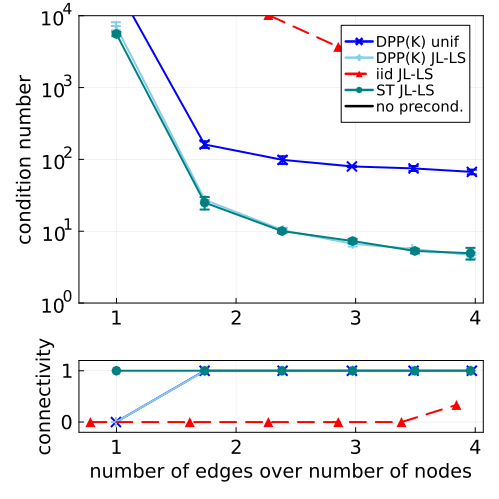

ST JL-LS

UndefVarError: UndefVarError: savefig not defined

In [44]:
# regularization parameter
q = 0.01

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "precond_PolBlogs_"*"q"*string(q)

# saving results
#save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e4)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
Plots.savefig("figures/"*name*".pdf")

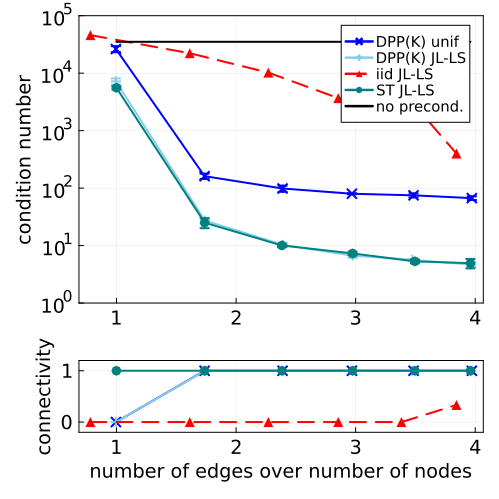

In [45]:
# # plotting
y_limits = (1,1e5)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)
# Plots.savefig("figures/"*name*".pdf")

### Magnetic polblogs

In [21]:
type = "MUN"

real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

# select largest connected component
temp = connected_components(g)
g = g[temp[1]]


# adding connection

model= :mun
η = 0
if type == "MUN"
    model = :mun
    η = 0.01
end
if type == "ERO"
    model = :ero
    η = 0.01
end

planted_score = randperm(rng,n)

meta_g = MetaGraph(g)
for e in edges(meta_g)
    u = src(e)
    v = dst(e)
    h_u = planted_score[u]
    h_v = planted_score[v]
    θ = (h_u - h_v) * π / (n - 1)
    if (model === :ero) && (rand(rng) < η) # Erdos-Renyi Outliers
        θ = rand(rng, (-n + 1):(n - 1)) * π / (n - 1)
    elseif model === :mun # Multiplicative Uniform Noise
        θ *= 1.0 + η * 2 * (rand(rng) - 0.5)
    end
    set_prop!(meta_g, e, :angle, θ)
end

# Laplacian 
B = magnetic_incidence(meta_g)
L = B' * B
l = eigvals(L)
# least eigenvalues to check the graph has one connected component
println(l[1:5]')

InterruptException: InterruptException:

In [22]:
# regularization parameter
q = 0.

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS"
    "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    "ST JL-LS"
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;methods)
name = "MUN_precond_PolBlogs_"*"q"*string(q)

# saving results
#save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
Plots.savefig("figures/"*name*".pdf")

ErrorException: cannot assign a value to variable Base.methods from module Main

In [23]:
# plotting
y_limits = (1,1e15)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

MethodError: MethodError: no method matching plot_comparison_cond(::Dict{Any, Any}, ::Tuple{Int64, Float64}; legendposition=:topright, methods=methods)
Closest candidates are:
  plot_comparison_cond(::AbstractDict, ::Any; legendposition, splg_methods) at /Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/src/utils.jl:1422 got unsupported keyword argument "methods"

In [22]:
function main_component(g)
    c = connected_components(g)
    _, i = findmax(length.(c))
    g[c[i]]
end

main_component (generic function with 1 method)

### Cond Mat 03 

n= 22963
m= 48436


cond nb of Laplacian: 3.596736904091388e9
method: DPP(K) unifmethod: 

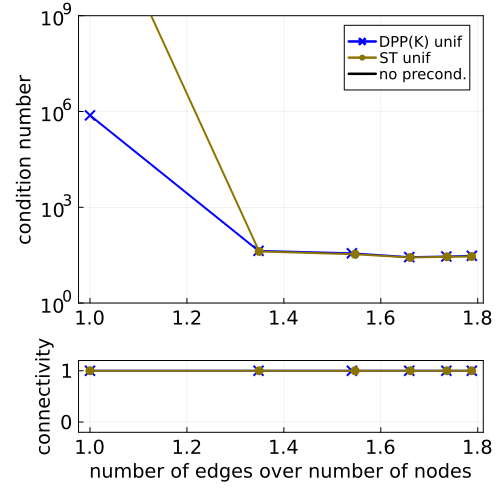

ST unif

In [33]:
# real_g = "as-22july06.gml" # too sparse
# real_g = "hep-th.gml" # too sparse

real_g = "cond-mat-2003.gml" # not too sparse

#
#real_g = "astro-ph.gml" # very sparse too


g = loadgraph(real_g, GraphIO.GML.GMLFormat())
g = main_component(g)
g = SimpleGraph(g)
n = nv(g)
m = ne(g)
println("n= ",n)
println("m= ",m)


rng = Random.default_rng()

# select largest connected component

model = :mun
η = 0.001
planted_score = randperm(rng,n)

meta_g = MetaGraph(g)
for e in edges(meta_g)
    u = src(e)
    v = dst(e)
    h_u = planted_score[u]
    h_v = planted_score[v]
    θ = (h_u - h_v) * π / (n - 1)
    if (model === :ero) && (rand(rng) < η) # Erdos-Renyi Outliers
        θ = rand(rng, (-n + 1):(n - 1)) * π / (n - 1)
    elseif model === :mun # Multiplicative Uniform Noise
        θ *= 1.0 + η * 2 * (rand(rng) - 0.5)
    end
    set_prop!(meta_g, e, :angle, θ)
end

# Laplacian 
# B = magnetic_incidence(meta_g)
# L = B' * B
# l = eigvals(L)
# least eigenvalues to check the graph has one connected component
# println(l[1:5]')

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

splg_methods = [
    "DPP(K) unif",
    # "DPP(K) JL-LS",
    #"DPP(K) LS"
    # "iid JL-LS",
    # "iid LS",
    # "ST JL-LS",
    # "ST LS",
    # "ST JL-LS"
    "ST unif",
]

# compute condition numbers
D_results = cond_numbers(meta_g,q,n_batch,n_rep,rng;splg_methods)
name = "MUN_precond_internet_"*"q"*string(q)

# saving results
#save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

# plotting
y_limits = (1,1e9)
plot_comparison_cond(D_results,y_limits;legendposition=:topright,splg_methods)

# saving plot
# Plots.savefig("figures/"*name*".pdf")